# Food-Vision 🍪🍰🍩

This project aims to build a Neural Network model **Using Custom dataset** to classify the type of food when feeded to the model

In [1]:
import torch
from torch import nn

torch.__version__

'2.0.1+cu118'

In [2]:
torch.cuda.device_count()

1

In [3]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Get data

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else: 
    print(f"{image_path} doesnot exist, creating one...")
    image_path.mkdir(parents = True, exist_ok = True)
    
    # Download pizza, steak and sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/aayush2058/pytorch_fundamentals/raw/6556f16009adebb8e3a1f7f20f0c2ae426fc321b/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data..")
        f.write(request.content)

    # Unzip pizza, steak and sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak and sushi data ..")
        zip_ref.extractall(data_path)

data\pizza_steak_sushi directory already exists... skipping download


## Data preparation and exploration

In [5]:
import os
def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [7]:
# Setup training and test path
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### Visualizing image
1. Get all of the image paths
2. Pick random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, lets open images with Python's PIL
5. Show the image and print metadata

Random image path: data\pizza_steak_sushi\train\pizza\2885050.jpg
Class : pizza
Image height : 512
Image width : 512


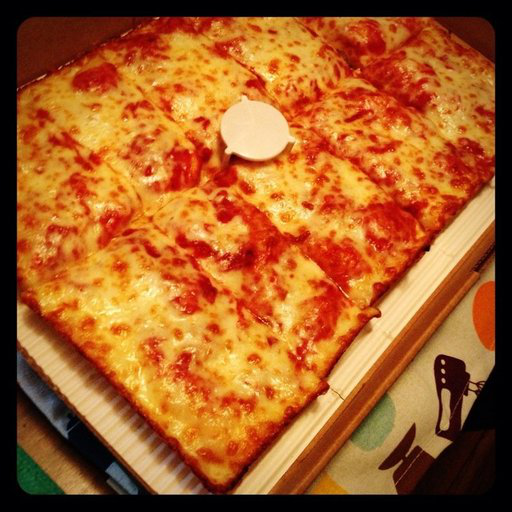

In [8]:
import random
from PIL import Image

# random.seed(42)

# 1. Getting image paths
image_path_list = list(image_path.glob("*/*/*.jpg")) # glob means combine files with similar features

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path) # if the image is corrupt, this throws error

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Class : {image_class}")
print(f"Image height : {img.height}")
print(f"Image width : {img.width}")
img

#### also,

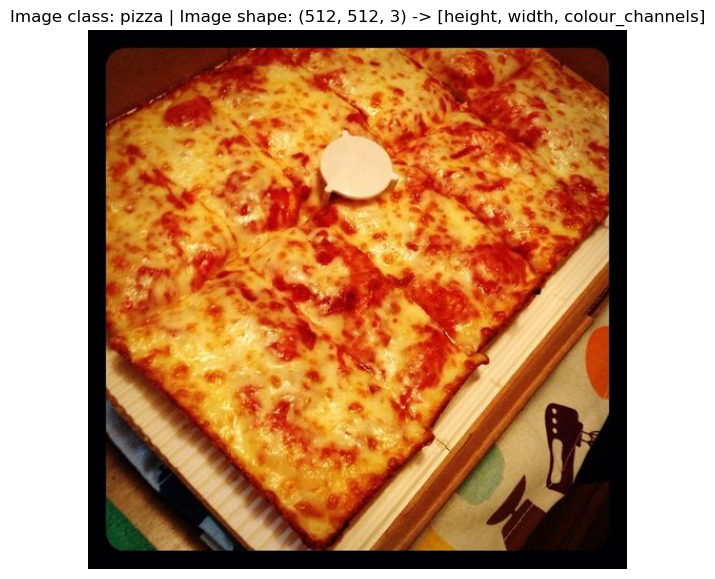

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.array(img)

# Plot the image with matplotlib
plt.figure(figsize = (10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, colour_channels]")
plt.axis(False);

## Transforming data
1. Turn target data into tensors
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`


In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size = (64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p = 0.5),
    # Turn the image into a torch tensor
    transforms.ToTensor()
])

In [12]:
data_transform(img)

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0471,  ..., 0.0471, 0.0039, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0078,  ..., 0.0196, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0039, 0.0118,  ..., 0.0157, 0.0039, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0039,  ..., 0.0392, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0157,  ..., 0.0157, 0.0078, 0.

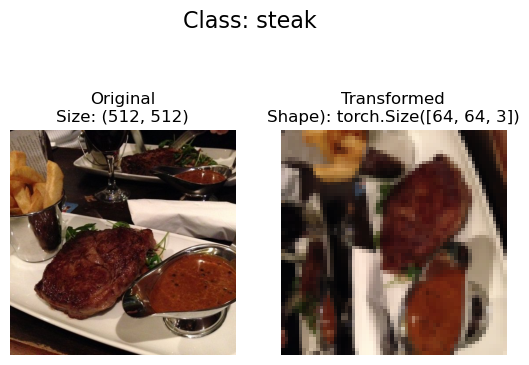

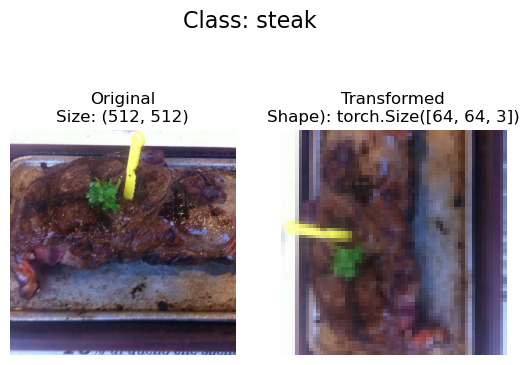

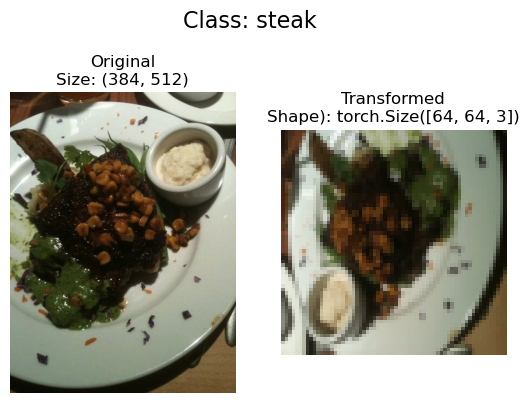

In [13]:
def plot_transformed_images(image_paths, transform, n=3, seed = None):
    """
    Selects random images from the path of images and loads/transforms them 
    then plots the original vs the transformed version
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)
            
            # Transform and plot target image
            transformed_image = transform(f).permute(2, 1, 0) # [C,H,W] -> [H,W,C] to support matplotlib
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape): {transformed_image.shape}")
            ax[1].axis("off"  )
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)
            
plot_transformed_images(image_paths = image_path_list,
                        transform = data_transform,
                        n = 3,
                        seed = None)
    

## Data Loading techniques

### Option 1: Loading image data using `ImageFolder`
We can load image classification data using `torchvision.datasets.ImageFolder`


In [14]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                 transform = data_transform, # transform for the data
                                 target_transform = None) # transform for the label

test_data = datasets.ImageFolder(root = test_dir,
                                transform = data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [16]:
# Get class name as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [17]:
# Get class name as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
# Check the length of dataset
len(train_data), len(test_data)

(225, 75)

In [19]:
train_data.samples[:5]

[('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1033251.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1044789.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1089334.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1105700.jpg', 0)]

In [20]:
train_data.targets[:5]

[0, 0, 0, 0, 0]

### This is what we want our data to be in

In [21]:
# Visualizing some samples from train data
img, label = train_data[0][0], train_data[0][1]
# or
img, label = train_data[0]
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image shape: torch.Size([3, 64, 64])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>


Original shape: torch.Size([3, 64, 64])
Permuted shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

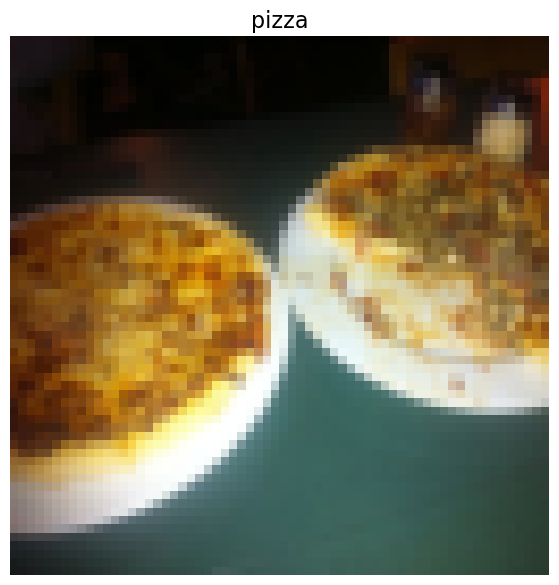

In [22]:
# Rearrange data for matplot
img_permute = img.permute(1, 2, 0)

# Print out shape
print(f"Original shape: {img.shape}")
print(f"Permuted shape: {img_permute.shape}")

# Plot the image
plt.figure(figsize = (10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 16)

## Turn loaded images into `DataLoader`'s

A `DataLoader` is going to help us turn our `Dataset`'s into iterables and we can customise the `batch_size` so our model can see `batch_size` amount image at a time.

In [23]:
os.cpu_count()

16

In [24]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 8, # os.cpu_count() means all the cpu cores
                             shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 8,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2db71ec0790>,
 <torch.utils.data.dataloader.DataLoader at 0x2db71ecec50>)

In [25]:
len(train_dataloader), len(test_dataloader) # change batchsize and see

(225, 75)

In [26]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1 (can be changed as prefered)
print(f"Image shape: {img.shape} -> [B, C, H, W]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [B, C, H, W]
Label shape: torch.Size([1])


### Create Datasets and DataLoaders (script model)

Using Jupyter magic function to create a .py file for creating DataLoaders.

Code cell's contents can be saved to a file using the Jupyter magic `%%writefile filename`

In [27]:
# Create a directory for going_modular scripts
import os
os.makedirs("going_modular")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'going_modular'

In [28]:
%%writefile going_modular/data_setup.py

"""
Contains functionality for creating PyTorch DataLoader's for image classification data.
"""
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(train_dir: str,
                      test_dir: str,
                      train_transform: transforms.Compose,
                      test_transform: transforms.Compose,
                      batch_size: int,
                      num_workers: int = NUM_WORKERS):
    """
    Creates training and testing DataLoaders.
    
    Takes in a training directory and testing directory path and turns them into
    PyTorch Datasets and then into PyTorch DataLoaders.
    
    Args:
      train_dir: Path to training directory.
      test_dir: Path to testing directory.
      transform: torchvision transforms to perform on training and testing data.
      batch_size: Number of samples per batch in each of the DataLoaders.
      num_workers: An integer for number of workers per DataLoader.
      
    Returns:
      A tuple of (train_dataloader, test_dataloader, class_names).
      Where class_names is the list of the target classes.
      Example usage:
        train_dataloader, test_dataloader, class_name = create_dataloaders(train_dir = path/to/train_dir,
          test_dir = path/to/test_dir,
          transform = some_transform,
          barch_size = 32,
          num_workers = 4)
          
    """
    
    # Using ImageFolder to create datasets
    train_data = datasets.ImageFolder(train_dir, transform = train_transform)
    test_data = datasets.ImageFolder(test_dir, transform = test_transform)
    
    # Get class names
    class_names = train_data.classes
    
    # Turn images into DataLoaders
    train_dataloader = DataLoader(train_data,
                                 batch_size = batch_size,
                                 shuffle = True,
                                 num_workers = num_workers,
                                 pin_memory = True)
    
    test_dataloader = DataLoader(test_data,
                                 batch_size = batch_size,
                                 shuffle = True,
                                 num_workers = num_workers,
                                 pin_memory = True)


    
    return train_dataloader, test_dataloader, class_names

Overwriting going_modular/data_setup.py


In [29]:
from going_modular import data_setup

a, b, c = data_setup.create_dataloaders(train_dir = train_dir,
                                      test_dir = test_dir,
                                      train_transform = data_transform,
                                      test_transform = data_transform,
                                      batch_size = 32)

a, b, c

(<torch.utils.data.dataloader.DataLoader at 0x2db6962d850>,
 ['pizza', 'steak', 'sushi'])

### Option 2: Loading image data with custom datasets 
##### (self made class)

1. Want to be able to load images from file
2. Want to be able to get class name from the Dataset
3. Want to be able to get classes as directory from the Dataset

**Pros:**
* Can create a `Dataset` out of almost anything
* Not limited to PyTorch pre-built `Dataset` functions

**Cons:**
* Even though we can create `Dataset` out of almost anything, it doesn't mean it will work..
* Using a custom `Dataset` ofter results in us writing more code, which could be prone to errors or performance issues




In [31]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [32]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#### Creating a helper function to get class name

We want a function to:
1. Get the class names using `os.scandir()` to tranverse a target directory (ideally the directory is in standard image classificatoin format).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory sturcture).
3. Turn the class names into a dict and a list and return them.

In [33]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [34]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """
    Finds the class folder names in a target directory.
    """
    # Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.... Please check file structure.")
    
    # Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [35]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#### Create a custom `Dataset` replicate `ImageFolder()`

To create our own custom dataset, we want to:

1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
    * paths - paths of our images
    * transform - the transform we'd like to use
    * classes - a list of the target classes
    * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image.
5. Overwrite the `__len__()` method to return the length of our dataset.
6. Overwrite the `__getitem__()` method to return a given sample when passed an index

In [36]:
# Write a custom dataset class
from torch.utils.data import Dataset

# Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # Initialize our custom dataset
    def __init__(self,
                 targ_dir: str,
                 transform = None):
        # Create class attributes
            # Get all of the image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
            # Setup transform
        self.transform = transform
            # Create classes and class_to_idx
        self.classes, self.class_to_idx = find_classes(targ_dir)
    
    # Create a function to load images
    def load_image(self, index: int) -> Image.Image:
        """
        Opens an image via a path and returns it.
        """
        image_path = self.paths[index]
        return Image.open(image_path) # gives images in visual form
    
    # Overwrite __len__()
    def __len__(self) -> int:
        """
        Returns the total number of samples
        """
        return len(self.paths)
    
    # Overwrite __getitem__() method to return a particular sample
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]: # Image, label
        """
        Returns one sample of data, data and label (X, y)
        """
        img = self.load_image(index)
        class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/img.jpg
        class_idx = self.class_to_idx[class_name]
        
        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return untransformed image, label
        

In [37]:
# Create a transform
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
])

In [38]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                     transform = train_transforms)

test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                    transform = train_transforms)

In [39]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x2db7313fe50>,
 <__main__.ImageFolderCustom at 0x2db729a2a90>)

In [40]:
len(train_data), len(train_data_custom)

(225, 225)

In [41]:
len(test_data), len(test_data_custom)

(75, 75)

In [42]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [43]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [44]:
# Check for equality between original ImageFolder dataset and Custom Dataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


### Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample images and plot them with matplotlib
7. Make sure the dimensions of our images line up with matplotlib (HWC)

In [45]:
# Create a function to take in dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                         classes: List[str] = None,
                         n: int = 10,
                         display_shape: bool = True,
                         seed: int = None):
    # Adjust display if n is too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10. Setting n as 10...")
    
    # Set the seed
    if seed:
        random.seed(seed)
    
    # Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k = n)
              
    # Setup plot
    plt.figure(figsize = (16, 8))
    
    # Loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        
        # Make dimensions line up with matplotlib (H, W, C)
        targ_image_adjust = targ_image.permute(1, 2, 0)
    
        # Plot adjusted image
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis('off')
        if classes:
            title = f"Class : {classes[targ_label]}"
        if display_shape:
            title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

For display purposes, n shouldn't be larger than 10. Setting n as 10...


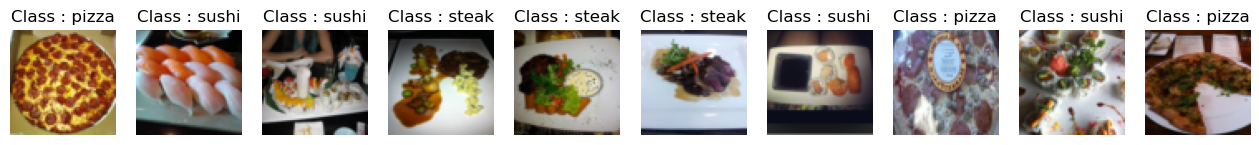

In [46]:
display_random_images(dataset = train_data_custom,
                    classes = train_data_custom.classes,
                    n = 20,
                    display_shape = True)

### Turn custom loaded images into `DataLoader`'s

In [47]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                    batch_size = BATCH_SIZE,
                                    num_workers = 0, # setting more CPU can cause error sometimes
                                     shuffle = True)

test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                   batch_size = BATCH_SIZE,
                                   num_workers = 0, 
                                   shuffle = False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x2db73598750>,
 <torch.utils.data.dataloader.DataLoader at 0x2db73431890>)

In [48]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

In [49]:
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## Data forms of transforms (data augmentation)
Data augmentation is the process of artificially adding diversity to the training data.

In the case of image data, this may mean applying various image transformations to the training images. (crop, zoom flip, rotate, filters)

This practice hopefully results in a model that's more generalizable to unseen data.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art levels...

#### Let's look at TrivialAugmentWide

In [50]:
from torchvision import transforms

train_transform = transforms.Compose([
                                     transforms.Resize(size = (224, 224)),
                                     transforms.TrivialAugmentWide(num_magnitude_bins = 31), # intensity of transform
                                     transforms.ToTensor()
                                     ])

test_transform = transforms.Compose([
                                    transforms.Resize(size = (224, 224)),
                                    transforms.ToTensor()
                                    ])

In [51]:
# Get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

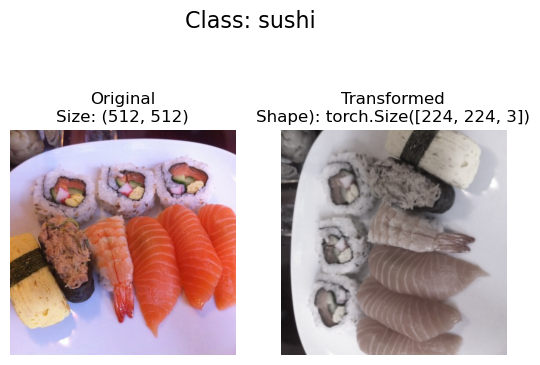

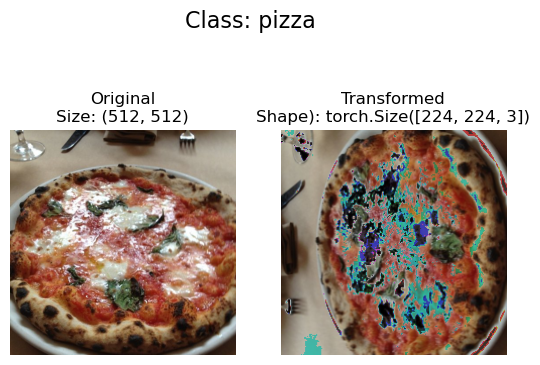

In [52]:
# Plot random transformed images
plot_transformed_images(image_paths = image_path_list,
                       transform = train_transform,
                       n = 2,
                       seed = None)

## Modelling

### Model_0: TinyVGG without data augmentation

let's replicate TinyVGG architecture from the CNN Explainer website

#### Creating transforms and loading data for Model0

In [53]:
# Create simple transoforms
simple_transform = transforms.Compose([
                                      transforms.Resize(size = (64, 64)),
                                      transforms.ToTensor()
                                      ])

In [54]:
# Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)

test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)

# Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoader's
train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle = True,
                                    num_workers = NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                              batch_size = BATCH_SIZE,
                              shuffle = False,
                              num_workers = NUM_WORKERS)
                              

In [55]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from CNN Explainer
    """
    def __init__(self, input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
                                        nn.Conv2d(in_channels = input_shape,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size = 2,
                                                    stride = 2) # default stride value is same as kernel size
                                        )
        self.conv_block2 = nn.Sequential(
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size = 2,
                                                    stride = 2) # default stride value is same as kernel size
                                        )
        self.conv_block2 = nn.Sequential(
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size = 2,
                                                    stride = 2) # default stride value is same as kernel size
                                        )
        self.classifier = nn.Sequential(
                                       nn.Flatten(),
                                       nn.Linear(in_features = hidden_units*11*11,
                                                out_features = output_shape)
                                        )
     
    def forward(self, x):
        x = self.conv_block1(x)
        print(x.shape)
        x = self.conv_block2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x
        # reassigning value to x each time takes time to store in memory and compute again and store in memory
        
        # This method is more efficient as it does computation faster (chunks it all in one hit).
#         return self.classifier(self.conv_block2(self.conv_block1(x)))

In [56]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3,
                 hidden_units = 15,
                 output_shape = len(class_names)
                 ).to(device)
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 15, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): ReLU()
    (5): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): ReLU()
    (3): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1815, out_features=3, bias=True)
  )
)

### Testing the model
Try a fordward pass on a single image

In [57]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [58]:
# Try a fordward pass
model_0(image_batch.to(device))[:5]

torch.Size([32, 15, 29, 29])
torch.Size([32, 15, 11, 11])
torch.Size([32, 3])


tensor([[-0.0566, -0.0435,  0.0126],
        [-0.0575, -0.0438,  0.0131],
        [-0.0571, -0.0442,  0.0132],
        [-0.0577, -0.0439,  0.0135],
        [-0.0575, -0.0442,  0.0132]], device='cuda:0',
       grad_fn=<SliceBackward0>)

#### Using `torchinfo` to get an idea of the shapes going through the model

torchinfo does the fordward propagation and displays the model summary

In [59]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
print(summary(model_0, input_size = [1, 3, 64, 64])) # input shape must match model input

torch.Size([1, 15, 29, 29])
torch.Size([1, 15, 11, 11])
torch.Size([1, 3])
Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 15, 29, 29]           --
│    └─Conv2d: 2-1                       [1, 15, 62, 62]           420
│    └─ReLU: 2-2                         [1, 15, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 15, 60, 60]           2,040
│    └─ReLU: 2-4                         [1, 15, 60, 60]           --
│    └─ReLU: 2-5                         [1, 15, 60, 60]           --
│    └─Conv2d: 2-6                       [1, 15, 58, 58]           2,040
│    └─ReLU: 2-7                         [1, 15, 58, 58]           --
│    └─MaxPool2d: 2-8                    [1, 15, 29, 29]           --
├─Sequential: 1-2                        [1, 15, 11, 11]           --
│    └─Conv2d: 2-9                       [1, 15, 27, 27]           2,040


### Making model TinyVGG with a script (`model_builder.py`)

In [61]:
%%writefile going_modular/model_builder.py
"""
Contains PyTorch model code to instantiate a TinyVGG model from the CNN Explainer website.
"""
import torch
from torch import nn

class TinyVGG(nn.Module):
    """
    Creates the TinyVGG architecture.
    
    Replicates the TinyVGG architecture from the CNN explainer website in PyTorch.
    
    Args:
      input_shape: An integer indicating number of input channels.
      hidden units: An integer indicating number of hidden units between layers.
      output_shape: An integer indicating number of output units.
    """
    def __init__(self, input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
                                        nn.Conv2d(in_channels = input_shape,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size = 2,
                                                    stride = 2) # default stride value is same as kernel size
                                        )
        self.conv_block2 = nn.Sequential(
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size = 2,
                                                    stride = 2) # default stride value is same as kernel size
                                        )
        self.conv_block2 = nn.Sequential(
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels = hidden_units,
                                                 out_channels = hidden_units,
                                                 kernel_size = 3,
                                                 stride = 1,
                                                 padding = 0),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size = 2,
                                                    stride = 2) # default stride value is same as kernel size
                                        )
        self.classifier = nn.Sequential(
                                       nn.Flatten(),
                                       nn.Linear(in_features = hidden_units*11*11,
                                                out_features = output_shape)
                                        )
     
    def forward(self, x):
#         x = self.conv_block1(x)
#         print(x.shape)
#         x = self.conv_block2(x)
#         print(x.shape)
#         x = self.classifier(x)
#         print(x.shape)
#         return x
        # reassigning value to x each time takes time to store in memory and compute again and store in memory
        
        # This method is more efficient as it does computation faster (chunks it all in one hit).
        return self.classifier(self.conv_block2(self.conv_block1(x)))


Overwriting going_modular/model_builder.py


### Train and Test loop functions

*`train_step()` - takes in a model and dataloader and trains the model on the dataloader.
*`test_step()` - takes in a model and dataloader and evaluates the model on the dataloader.

In [ ]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device) -> Tuple(float, float):
    # Put the model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to the target device
        x, y = X.to(device), y.to(device)
        
        # Fordward pass
        y_pred = model(x)
        
        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # Optimizer zero grad
        optimizer.zero_grad()
        
        # Loss backward
        loss.backward()
        
        # Optimizer step
        optimizer.step()
        
        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)

    # Adjust matrices to get average loss and accuracy per batch
    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)
    
    return train_loss, train_acc

In [ ]:
# Create train_step()
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device) -> Tuple(float, float):
    # Put the model in eval mode
    model.eval()
    
    # Setup train loss and train accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference model
    with torch.inference_mode():
        # Loop through data loader data batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to the target device
            x, y = X.to(device), y.to(device)

            # Fordward pass
            y_pred = model(x)

            # Calculate the loss
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()

            # Calculate accuracy metric
            y_pred_class = torch.argmax(y_pred, dim = 1)
            test_acc += (y_pred_class==y).sum().item()/len(y_pred)

    # Adjust matrices to get average loss and accuracy per batch
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)

    return test_loss, test_acc

In [ ]:
# Create a train function
from tqdm.notebook import tqdm
def train(epochs: int,
          model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer,
          device = device):
    
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    
    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model = model,
                                          dataloader = train_dataloader,
                                          loss_fn = loss_fn,
                                          optimizer = optimizer,
                                          device = device)
        
        test_loss, test_acc = test_step(model = model,
                                          dataloader = test_dataloader,
                                          loss_fn = loss_fn,
                                          device = device)
        
        # Print out what's happening
        print(f"Epoch: {epoch} | train loss: {train_loss:.4f} | train_acc: {train_acc:.2f}% | test loss: {test_loss:.4f} | test_acc: {test_acc:.2f}% ")
    
        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    
    # return results dictionary
    return results

In [ ]:
# In real case, we dont want to use a random seed to train a model as it needs be consitent with any of the data thrown at it

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3,
                 hidden_units = 15,
                 output_shape = len(train_data.classes))

model_0.to(device)

# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                            lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train_model
model_0_results = train(epochs = NUM_EPOCHS,
                        model = model_0,
                       train_dataloader = train_dataloader_simple, # without data augmentation
                       test_dataloader = test_dataloader_simple,
                       optimizer = optimizer,
                       loss_fn = loss_fn)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time} seconds")

In [ ]:
model_0_results

### Train function into a script (`engine.py`)

In [62]:
%%writefile going_modular/engine.py
"""
Contains functions for training and testing a PyTorch model.
"""
from typing import Dict, List, Tuple

import torch

from tqdm.auto import tqdm

# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device) -> Tuple(float, float):
    # Put the model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to the target device
        x, y = X.to(device), y.to(device)
        
        # Fordward pass
        y_pred = model(x)
        
        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # Optimizer zero grad
        optimizer.zero_grad()
        
        # Loss backward
        loss.backward()
        
        # Optimizer step
        optimizer.step()
        
        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)

    # Adjust matrices to get average loss and accuracy per batch
    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)
    
    return train_loss, train_acc


# ---------------------------------------------------------


# Create train_step()
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device) -> Tuple(float, float):
    # Put the model in eval mode
    model.eval()
    
    # Setup train loss and train accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference model
    with torch.inference_mode():
        # Loop through data loader data batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to the target device
            x, y = X.to(device), y.to(device)

            # Fordward pass
            y_pred = model(x)

            # Calculate the loss
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()

            # Calculate accuracy metric
            y_pred_class = torch.argmax(y_pred, dim = 1)
            test_acc += (y_pred_class==y).sum().item()/len(y_pred)

    # Adjust matrices to get average loss and accuracy per batch
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)

    return test_loss, test_acc

# ------------------------------------------------------

# Create a train function
from tqdm.notebook import tqdm
def train(epochs: int,
          model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer,
          device = device):
    
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    
    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model = model,
                                          dataloader = train_dataloader,
                                          loss_fn = loss_fn,
                                          optimizer = optimizer,
                                          device = device)
        
        test_loss, test_acc = test_step(model = model,
                                          dataloader = test_dataloader,
                                          loss_fn = loss_fn,
                                          device = device)
        
        # Print out what's happening
        print(f"Epoch: {epoch} | train loss: {train_loss:.4f} | train_acc: {train_acc:.2f}% | test loss: {test_loss:.4f} | test_acc: {test_acc:.2f}% ")
    
        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    
    # return results dictionary
    return results

Writing going_modular/engine.py


### Plot the loss curve
A **loss curve** is a way of tracking model's progress over time.

In [ ]:
# Get the model_0_results keys
model_0_results.keys()

In [ ]:
def plot_loss_curve(results: Dict[str, List[float]]):
    """
    Plots training curves of a results dictionary..
    """
    # Get the loss values of the results dictionary(training and test)
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]
    
    # Get the accuracy values of the results dictionary(training and test)
    train_accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]
    
    # Figure out how many epochs there were
    epochs = range(len(results["train_loss"]))
    
    # Setup a plot
    plt.figure(figsize = (15, 7))
    
    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label = "train_loss")
    plt.plot(epochs, test_loss, label = "test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label = "train_accuracy")
    plt.plot(epochs, test_accuracy, label = "test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

In [ ]:
plot_loss_curve(model_0_results)

#### Not an ideal curve

### Model_1 - TinyVGG with Data Augmentation

#### Transform

In [ ]:
# Create a transform with augmentation
train_transform_augmented = transforms.Compose([
                                               transforms.Resize(size =(64, 64)),
                                               transforms.TrivialAugmentWide(num_magnitude_bins = 31),
                                               transforms.ToTensor()
                                            ])

test_transform_augmented = transforms.Compose([
                                              transforms.Resize(size = (64, 64)),
                                              transforms.ToTensor()
                                            ])

#### Datasets

In [ ]:
# Turning image folders into datasets
train_data_augmented = datasets.ImageFolder(root = train_dir,
                                           transform = train_transform_augmented)
test_data_augmented = datasets.ImageFolder(root = test_dir,
                                          transform = test_transform_augmented)

#### Datasets to DataLoaders

In [ ]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset = train_data_augmented,
                                       batch_size = BATCH_SIZE,
                                       shuffle = True,
                                       num_workers = NUM_WORKERS)

test_dataloader_augmented = DataLoader(dataset = test_data_augmented,
                                       batch_size = BATCH_SIZE,
                                       shuffle = False,
                                       num_workers = NUM_WORKERS)

#### Instantiate model

In [ ]:
# Create model_1 and send it to target device
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG(input_shape = 3,
                  hidden_units = 15,
                  output_shape = len(train_data_augmented.classes)
                 ).to(device)

model_1


#### Train and test

In [ ]:
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                            lr = 0.001)

# Start the timer
start_time = timer()

# Train model_1
model_1_results = train(model = model_1,
                       train_dataloader = train_dataloader_augmented,
                       test_dataloader = test_dataloader_augmented,
                       optimizer = optimizer,
                       loss_fn = loss_fn,
                       epochs = NUM_EPOCHS,
                       device = device)
end_time = timer()
total_time_for_model_1 = end_time - start_time

print(f"Training time: {total_time_for_model_1}")


In [ ]:
model_1_results

In [ ]:
plot_loss_curve(model_1_results)

### Compare model results
ways:
1. Hard coding
2. Tools - pytorch tensorboard
3. weights and biases - https://wandb.ai/site
4. MLFlow - https://mlflow.org


In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

model_0_df

In [ ]:
model_1_df

In [ ]:
# Setup a plot
plt.figure(figsize = (15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label = "Model 0")
plt.plot(epochs, model_1_df["train_loss"], label = "Model 1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label = "Model 0")
plt.plot(epochs, model_1_df["test_loss"], label = "Model 1")
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label = "Model 0")
plt.plot(epochs, model_1_df["train_acc"], label = "Model 1")
plt.title("Train accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label = "Model 0")
plt.plot(epochs, model_1_df["test_acc"], label = "Model 1")
plt.title("Test accuracy")
plt.xlabel("Epochs")
plt.legend()

## Making a prediction on a custom image

In [ ]:
# Downloading custom image
import requests

# Setup custom image path
custom_image_path =  data_path/ "square_pizza.jpg"

# Download the image if it doesnot already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" filter
        request = requests.get("https://github.com/aayush2058/pytorch_fundamentals/raw/main/data/square_pizza.jpg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download...")

        

### Loading in a custom image with PyTorch

We have to make sure out custom image in the same format as the data our model was trained on.
* In tensor form with datatype (torch.float32)
* Of shape 64x64x3
* On the right device

We can read an image into Pytorch using `torchvision.io.read_image`

In [ ]:
import torchvision

# Read in cusotm image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
# above function returns uint8 and 0-255

print(f"Custom image tensor: {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

In [ ]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))
plt.axis('off')

**Model was trained on 64, 64 image but this image has larger size**


In [ ]:
# images need to be in float32 dtype
custom_image_float = custom_image_uint8.type(torch.float32) 

# Images need to be in between 0 and 1 
custom_image_b_0and1 = custom_image_uint8 / 255

# Creating a transformer
# image shape should match model input shape
custom_image_transformer = transforms.Compose([transforms.Resize(size = (64, 64))])

custom_image_transformed = custom_image_transformer(custom_image_b_0and1)

print(f" Shape: {custom_image_transformed.shape}")
print(f"datatype: {custom_image_transformed.dtype}")




In [ ]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))
plt.axis('off')

#### Add a batch dimension

In [ ]:
# Our model takes 4 dimensions (including batch dimension)
custom_image_transformed_with_batch = custom_image_transformed.unsqueeze(0)

print(f" Trainable shape (with batch dimension): {custom_image_transformed_with_batch.shape}")

### Making prediction

In [ ]:
model_1.eval()
with torch.inference_mode():
    # logits
    y_preds = model_1(custom_image_transformed_with_batch.to(device))
    # Prediction probabilities
    y_preds = torch.softmax(y_preds, dim = 1)
    # Prediction label
    y_preds = torch.argmax(y_preds, dim = 1)
    print("")
    print(f"Prediction probability is index {y_preds.item()} which is {class_names[y_preds.item()]}")

In [ ]:
custom_prediction.dtype

### Making a function to predict and plot

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                       image_path: str,
                       class_names: List[str] = None,
                       transform = None,
                       device = device):
    """
    Make a prediction on a target image with a trained model and plots the image and predcitions
    """
    # Load in the image and allign with model input
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image/255
    
    # Transform if necessary
    if transform:
        target_image = transform(target_image)
        
    # Make sure the model is in the target device
    model.to(device)
    
    # Turn on eval/inference mode and make a prediction
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image (this is the batch dimension, e.g our image will predict on 1x image)
        target_image = target_image.unsqueeze(0)
    
        # Make a prediction on the image with an extra dimension
        target_image_pred = model(target_image.to(device)) # making sure image is on right device
        
    # Convert logits -> prediction probabilities
    target_image_pred_probs = torch.softmax(target_image_pred, dim = 1)
    
    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim = 1)
    
    # Plot the image alongside the predicion and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dimension and rearrange shape to HWC
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)
        
    

In [ ]:
pred_and_plot_image(model = model_1,
                   image_path = custom_image_path,
                   class_names = class_names,
                   transform = custom_image_transformer,
                   device = device)

## Saving a model (on script)

In [63]:
%%writefile going_modular/utils.py
"""
File containing various utility functions for PyTorch Model Trainig.
"""

from pathlib import Path
import torch
from torch import nn

def save_model(model: torch.nn.Module,
              target_dir: str,
              model_name: str):
    """
    Saves a Pytorch model to a target directory.
    
    Args:
        model: A target PyTorch model to save.
        target_dir: A directory for saving the model to.
        model_name: A filename for the saved model. Should include either
          ".pth" or ".pt" as the file extension
          
    Example usage:
    save_model(model = model_1
               target_dir = "models"
               model_name = "05-going_modular_tinyvgg_model.pth")
    """
    
    #Create target directory
    target_dir_path = Path(target_dir)
    target_dir_path.mkdir(parent = True,
                         exist_ok = True)
    
    # Create model save path
    assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
    model_save_path = target_dir_path / model_name
    
    # Save the model state dict()
    print(f"[INFO] Saving model to: {model_save_path}")
    torch.save(obj = model.state_dict(),
              f = model_save_path)

Writing going_modular/utils.py


In [65]:
!python going_modular/train.py ...

python: can't open file 'C:\\Users\\User\\Desktop\\pytorch\\going_modular\\train.py': [Errno 2] No such file or directory
